In [1]:
%reload_ext autoreload
%autoreload

%reload_ext autoreload
%autoreload 2
import os
from pathlib import Path
import sys
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import pandas as pd

# Increase the resolution of all the plots below
plt.rcParams.update({"figure.dpi": 200,"figure.facecolor":"w","figure.figsize": (15,10)})

In [2]:
# (import) helper functions
dir_proj = Path("__file__").parent.absolute()
dir_rawdata = Path.joinpath(dir_proj.parent.absolute(), "data")
dir_prep = Path.joinpath(dir_proj,"results")
print(dir_rawdata)


c:\Users\User\Desktop\kiel\tremor_music_ap\data


In [3]:
# find all videos in path
f_list = os.listdir(dir_rawdata)
str_match = 'BS'
dir_patients = [s for s in f_list if str_match in s]

In [15]:
# define cfg vars
cfg_srate = 100
cfg_group = {1:"Standard & exp. music", 2:"Standard & unspecific music", 3: "Only Standard", 4: "Placebo"}
cfg_trial = {1: "Standing flexed", 2:"Sitting", 3: "Standing relaxed"}
cfg_visit = {1:"Inital", 2:"14-days"}


In [4]:
 # set params for epoch processing and plotting


cfg_filter_window = [2,12]
cfg_freqs_oi = [2,10]
cfg_thresh_level_mp = .5

tmp_dir_patients = dir_patients[1:3]
for dir_sub in tmp_dir_patients:
    nms_files = os.listdir(Path.joinpath(dir_rawdata,dir_sub))
    print(nms_files[0])
    tmp = pd.read_excel(Path.joinpath(dir_rawdata,dir_sub,nms_files[0]),header=None)


BS0253 - 0 - prova 1.xlsx
BS0264 - 0 - prova 1.xlsx


In [5]:
x = tmp.iloc[:,0]
y = tmp.iloc[:,1]
z = tmp.iloc[:,2]


In [30]:
from scipy.signal import butter, filtfilt

def butter_bandpass(lowcut, highcut, fs, order=5):
    nyq = 0.5 * fs
    low = lowcut / nyq
    high = highcut / nyq
    b, a = butter(order, [low, high], btype='band')
    return b, a


def butter_bandpass_filter(data, lowcut, highcut, fs, order=5):
    b, a = butter_bandpass(lowcut, highcut, fs, order=order)
    y = filtfilt(b, a, data)
    return y

In [36]:
from scipy.stats import zscore
import numpy as np

filt = butter_bandpass_filter(y, 1, 15, cfg_srate)
data_zm = filt-np.nanmean(filt)


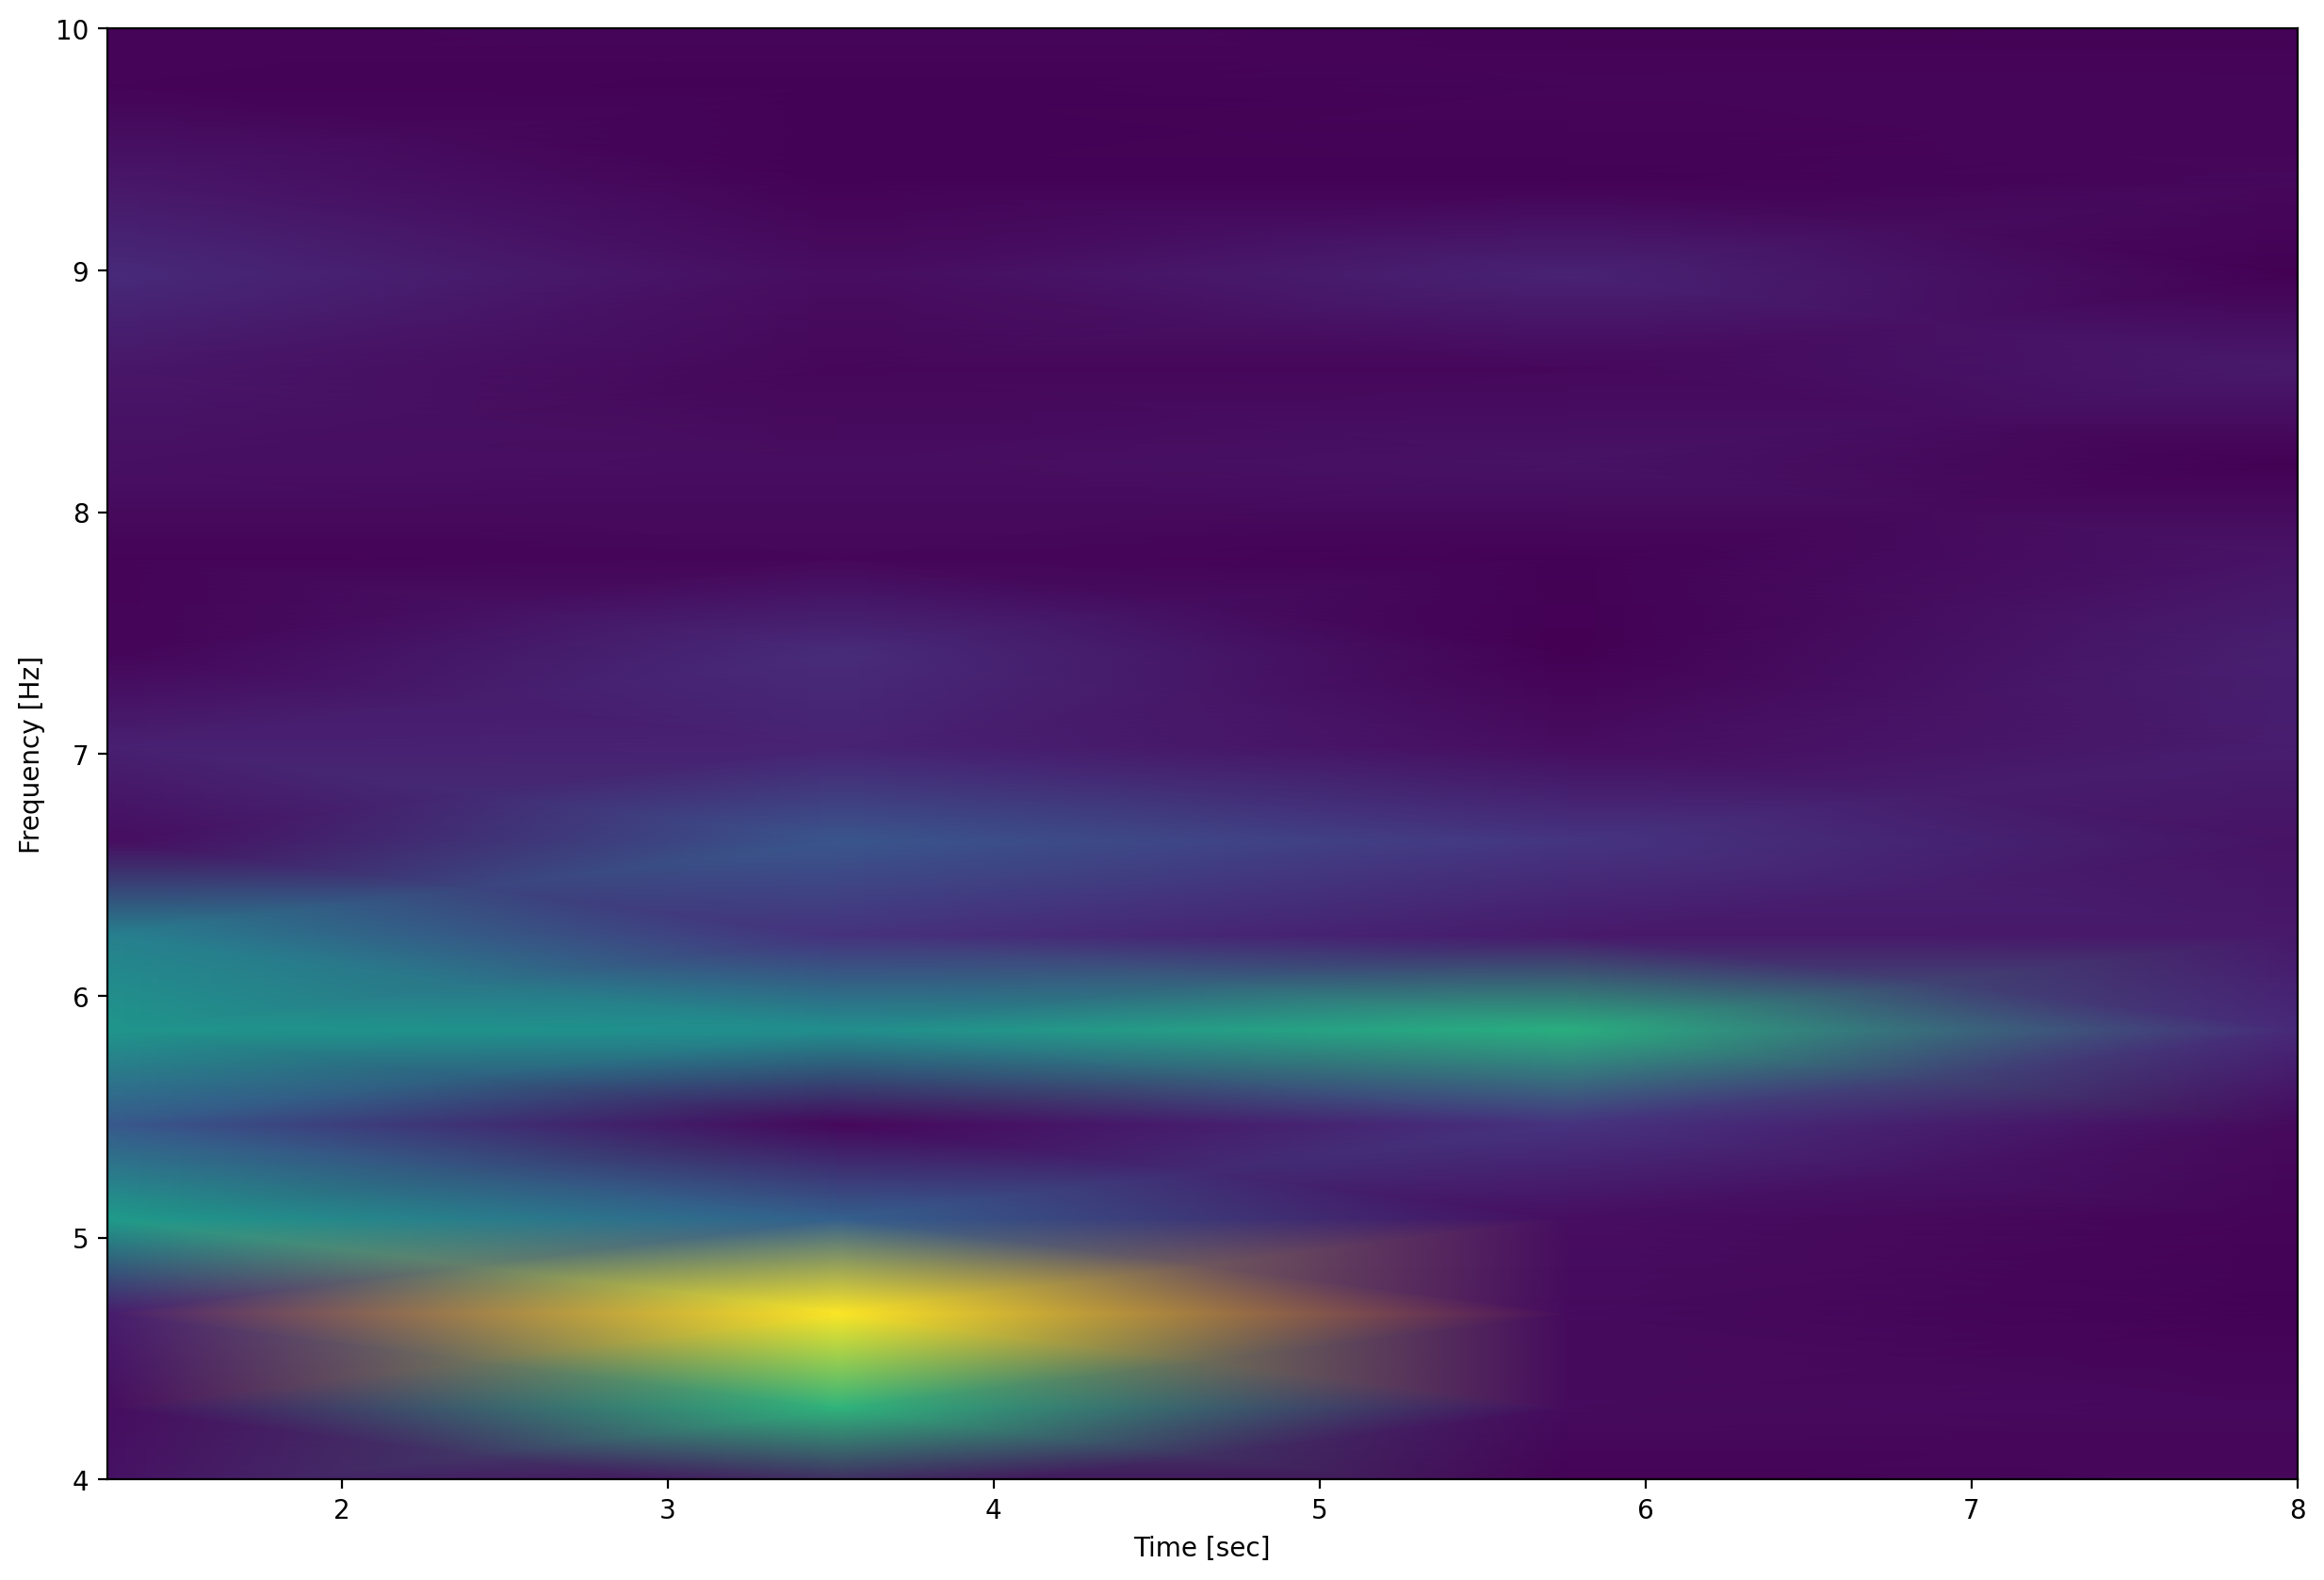

In [37]:
from scipy import signal 

f, t, Sxx = signal.spectrogram(data_zm, cfg_srate)
plt.pcolormesh(t, f, Sxx, shading='gouraud')
plt.ylabel('Frequency [Hz]')
plt.xlabel('Time [sec]')
plt.ylim([4,10])
plt.show()


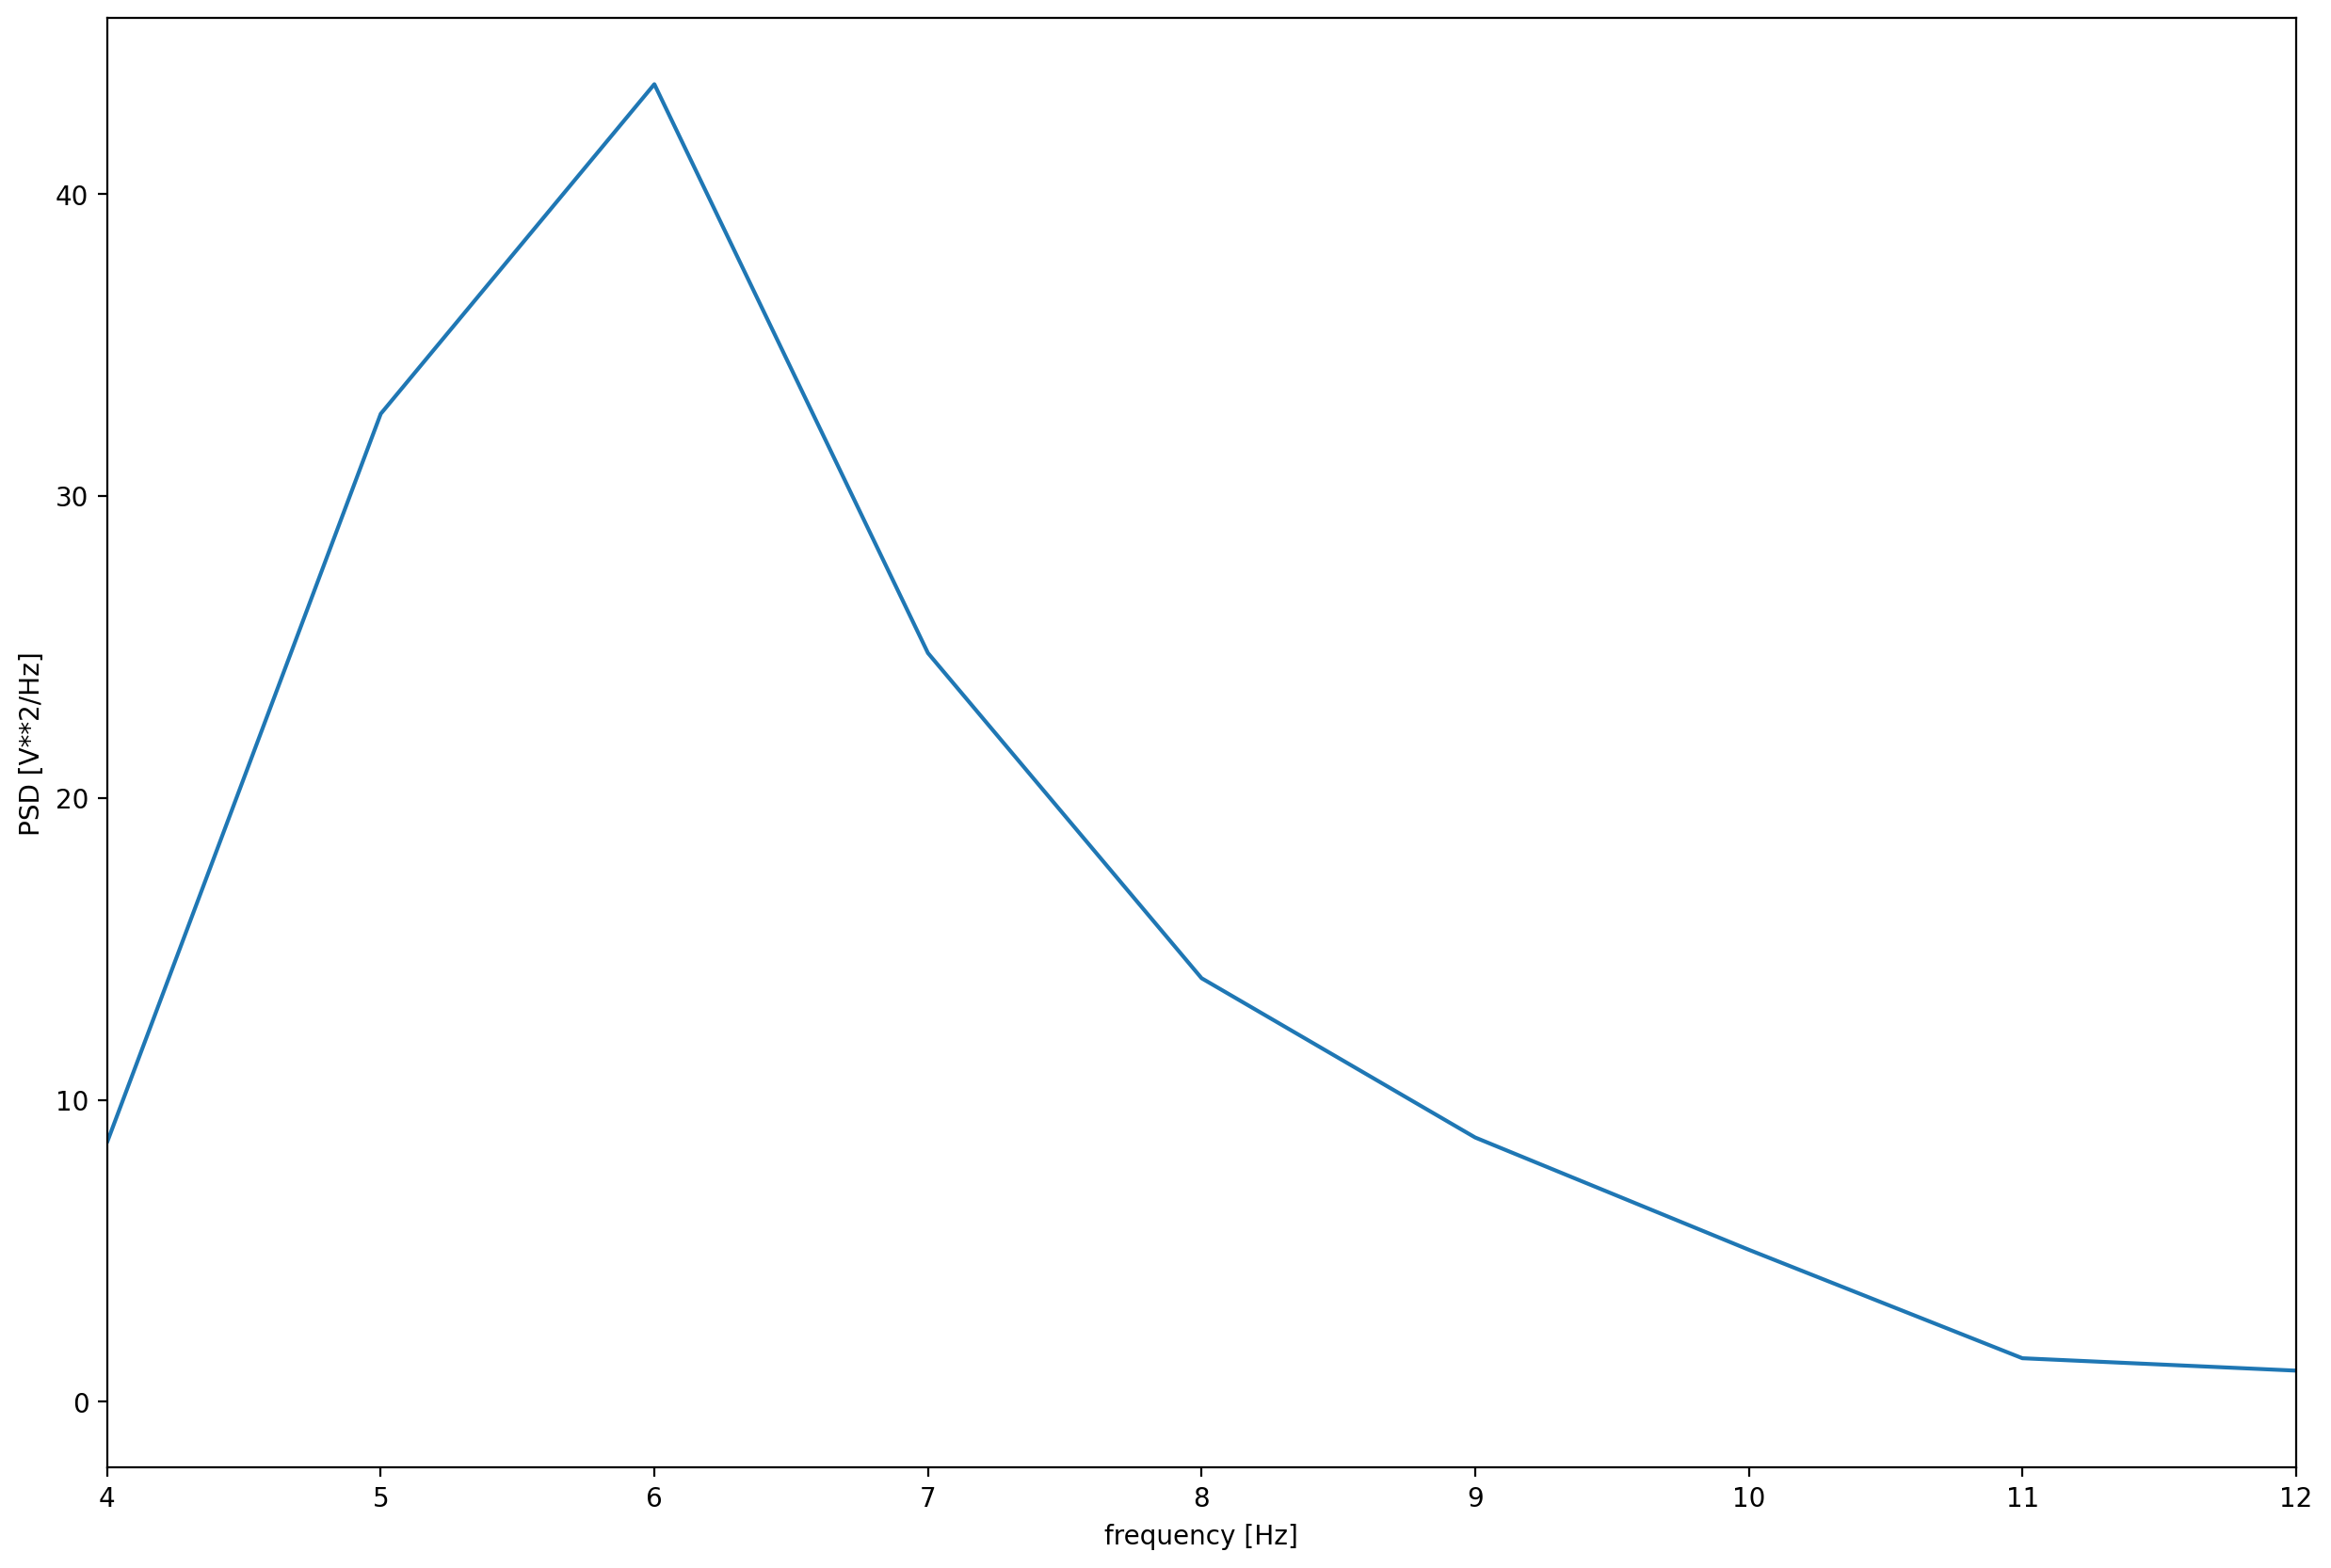

In [40]:
f, Pxx_den = signal.welch(data_zm, cfg_srate, nperseg = cfg_srate, average='median')
plt.plot(f, Pxx_den)
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.xlim([4,12])

plt.show()